# <font color='Blue'>Linear Regression</font>

## <font color='Blue'>Objectives</font>
   1. Understand the concept of multiple linear regression and its applications in predictive analytics
   2. Build multiple linear regession models using python packages
   3. Apply Regression Diagnostics
   4. Perform model validation tasks and make predictions
   
### <font color='Blue'>References</font>
   1. Machine Learning Using Python,Pradhan Manaranjan and U Dinesh Kumar, Wiley Publications
   2. Applied Multivariate Statistical analysis, Sixth Edition, Richard A Johnson and Dean W Wichern
   3. Multivariate Data Analysis, Seventh Edition, Hair et al., Pearson publication
   4. Internet sources, for pictures, under fair use policy
      https://towardsdatascience.com/linear-regression-explained-1b36f97b7572
      https://www.keboola.com/blog/linear-regression-machine-learning

## <font color='Blue'>Contents</font>   

  ### <font color='Blue'>1. What is Multiple Linear Regression</font>
  ### <font color='Blue'>2. Multiple Linear Regression Application</font>
  ### <font color='Blue'>3. Building a Multiple Linear Regression Model</font>
     STEP 1: Collect, Extract, Analyze Data
             [Predicting the SOLD Price (Auction Price) of Players]
     STEP 2: Processing Data
             [Create Feature Set]
             [Encoding Categorical Features]
     STEP 3: Dividing data into training and validation datasets
     STEP 4: Build the model
     STEP 5: Multi-Collinearity: Measurement and Management
             - Variance Inflation Factor (VIF)
             - Handling attributes with high VIF
     STEP 5: Perform model diagnostics
             Residual Analysis (LINE Principle)
             - Linearity
             - Independence of residuals
             - Normality of residuals
             - Homoscedasticity
     STEP 6: Influencer Analysis
     STEP 7: Measure model accuracy and validate model
     STEP 8: Make Predictions

## <font color='Blue'>1. What is Multiple Linear Regression</font>

  Multiple Linear Regression is a statistical technique for finding the existence of an associaton relationship between a 
  dependent variable (aka response variable or outcome variable) and several independent variables (aka explanatory variable,  
  predictor variable or feature). 

    
### <font color='Blue'>Mathematical Background</font>
 
#### <font color='Blue'>Functional Form of SLR</font>
      Y  = β0 + β1.X1 + β2.X2 + β3.X3 + ... + βn.Xn + ε                                           
      [Response] = [mean value depending on X's] + error               
      Linear refers to the fact that mean is a linear function of unknown parameters β0 and β1.
      ε = Y - β0 - β1.X1 - β2.X2 - β3.X3 - ... - βn.Xn
        
<img src="Regression_Plane.jpg" width="600" height="800">
 
#### <font color='Blue'>Regression Objective</font>
      Let the number of samples be n                    
      Minimize sum of squared residuals                  
      Minimize  ∑(yi - ŷi)^2 over i=1 to i=n    
                where ŷi = β0 + β1.X1i + β2.X2i - β3.X3i                   
                yi is the actual value of y             
                ŷi is the predicted value of y           
      Minimize  ∑(yi - β1.X1i - β2.X2i - β3.X3i - ... - βn.Xni )^2 over i=1 to i=n     
      by finding β0, β1, ..., βn that minimizes the above equation
      
#### <font color='Blue'>Regression Properties</font>
      In eqn form:     Y  = β0 + β1.X1 + β2.X2 + β3.X3 + ... + βn.Xn  + ε
      In matrix form: [Y] = [β][X] + [ε]
                     (nx1)  (nx(r+1) (nx1)
      where n is the number of samples
            r is the number of predictors
      E(ε) = 0
      Var(ε) = constant    
      Relation between Y and X is linear
      Residuals are independent
      
<img src="MLR_Matrix.jpg"  width="500" height="600">
      
####  <font color='Blue'>Regression Properties to be tested (Diagnostics)</font>
1. Linearity        - The relationship between y and x is linear
2. Independence     - The errors are independent of each other (not correlated, especially in a time series)
3. Normality        - The errors (aka residuals) εi follow a normal distribution with mean(ε) = 0
4. Homoscedasticity - The variance var(ε) is constant for different values of X. When var(ε) is constant, it in known as homoscedasticity. When var(ε) is not constant, it is heteroscedasticity   

<img src="Regression_Assumptions.jpg"  width="500" height="600">

## <font color='Blue'>2. Multiple Linear Regression Application</font>

<b> Case Description to be Added <b>

## <font color='Blue'>3. Building a Simple Linear Regression Model</font>
     STEP 1: Collect, Extract, Analyze Data
             [Predicting the SOLD Price (Auction Price) of Players]
     STEP 2: Process Data
             [Create Feature Set]
             [Encoding Categorical Features]
     STEP 3: Dividing data into training and validation datasets
     STEP 4: Build the model
     STEP 5: Multi-Collinearity: Measurement and Management
             - Variance Inflation Factor (VIF)
             - Handling attributes with high VIF
     STEP 5: Perform model diagnostics
             Residual Analysis (LINE Principle)
             - Linearity
             - Independence of residuals
             - Normality of residuals
             - Homoscedasticity
     STEP 6: Influencer Analysis
     STEP 7: Measure model accuracy and validate model
     STEP 8: Make Predictions

### <font color='Green'>Loading Libraries</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

# Setting pandas print option to limit decimal places to 4
np.set_printoptions(precision=4, linewidth=100) 

### <font color='Green'>STEP 1: Collect, Extract, Analyze Data</font>

In [2]:
# Loading Data
data_df = pd.read_excel('IMB529-XLS-ENG.XLSX',sheet_name='MH-Modified Data')

<b> There are 248 observations and 26 features in the data. No missing values </b>

In [3]:
# Displaying 10 columns of few records
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SL.                           248 non-null    int64  
 1   AGE                           248 non-null    float64
 2   GEN                           248 non-null    object 
 3   GENDER                        248 non-null    int64  
 4   MARITAL_STATUS                248 non-null    object 
 5   UNMARRIED                     248 non-null    int64  
 6   KEY COMPLAINTS_CODE           212 non-null    object 
 7   ACHD                          248 non-null    int64  
 8   CAD_DVD                       248 non-null    int64  
 9   CAD_SVD                       248 non-null    int64  
 10  CAD_TVD                       248 non-null    int64  
 11  CAD_VSD                       248 non-null    int64  
 12  OS_ASD                        248 non-null    int64  
 13  other

<b> Notes </b>

    Male(Female)        = 0(1)
    Married(Unmarried)  = 0(1) 
    Alert(unconsious)   = 1(0)
    Elective(Emergency) = 1(0) 
    Implant(no implant) = 1(0)

###  <font color='Green'>STEP 2: Process Data</font>
#### <font color='Green'>STEP 2.1: Detecting and Removing Outliers</font>

In [4]:
print(data_df.shape)

(248, 50)


#### <font color='Green'>Detecting Removing Outliers</font>

In [5]:
data_df['z_score_tc'] = zscore( data_df['TOTAL_COST_TO_HOSPITAL'] )

In [6]:
data_df[ ( data_df.z_score_tc > 3.0) | ( data_df.z_score_tc < -3.0) ]

,SL.,AGE,GEN,GENDER,MARITAL_STATUS,UNMARRIED,KEY COMPLAINTS_CODE,ACHD,CAD_DVD,CAD_SVD,...,TYPE_OF_ADMSN,ELECTIVE,TOTAL_COST_TO_HOSPITAL,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,IMPLANT_USED_(Y/N),IMPLANT,COST_OF_IMPLANT,z_score_tc
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,660293.0,25,12,13,Y,1,38000,3.772841
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,809130.0,41,20,21,Y,1,39690,4.989425
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,629990.0,14,13,1,Y,1,89450,3.525146
6,7,73.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,887350.0,15,15,0,N,0,0,5.628790
12,13,40.0,M,0,MARRIED,0,RHD,0,0,0,...,ELECTIVE,1,711616.0,17,10,7,Y,1,196848,4.192352


#### <font color='Green'>Removing Outliers</font>

In [7]:
data_df = data_df.drop([0, 1,3,6,12])
data_df = data_df.drop(['z_score_tc'],axis=1)
data_df.shape 

(243, 50)

#### <font color='Green'>STEP 2.2: Create Feature Set</font>

#### <font color='Green'>Cleaning Data</font>

In [8]:
# Identifying Columns
print(data_df.columns)
print("")

# Remove attributes that cannot be predictors - 'Sl.'
data_df = data_df.drop(['SL.','TOTAL_LENGTH_OF_STAY'],axis=1)
# data_df = sm.add_constant( data_df, prepend=True ) 
print(data_df.columns)

Index(['SL.', 'AGE', 'GEN', 'GENDER', 'MARITAL_STATUS', 'UNMARRIED',
       'KEY COMPLAINTS_CODE', 'ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
       'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
       'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
       'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
       'PAST_MEDICAL_HISTORY_CODE', 'Diabetes1', 'Diabetes2', 'hypertension1',
       'hypertension2', 'hypertension3', 'other', 'HB', 'UREA', 'CREATININE',
       'MODE_OF_ARRIVAL', 'AMBULANCE', 'TRANSFERRED',
       'STATE_AT_THE_TIME_OF_ARRIVAL', 'ALERT', 'TYPE_OF_ADMSN', 'ELECTIVE',
       'TOTAL_COST_TO_HOSPITAL', 'TOTAL_LENGTH_OF_STAY', 'LENGTH_OF_STAY_ICU',
       'LENGTH_OF_STAY_WARD', 'IMPLANT_USED_(Y/N)', 'IMPLANT',
       'COST_OF_IMPLANT'],
      dtype='object')

Index(['AGE', 'GEN', 'GENDER', 'MARITAL_STATUS', 'UNMARRIED',
       'KEY COMPLAINTS_CODE', 'ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
       'CAD_VSD', 'OS_ASD', 'o

#### <font color='Green'>Removing Rows with Missing Values</font>

In [9]:
features =    ['AGE', 'GENDER', 'UNMARRIED', 'ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
              'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
              'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
              'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
              'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
              'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
              'TRANSFERRED', 'ALERT', 'ELECTIVE',  
              'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT', 'COST_OF_IMPLANT','TOTAL_COST_TO_HOSPITAL']
data_df_cleaned = data_df[features]
data_df_cleaned.shape

(243, 40)

In [10]:
data_df_cleaned = data_df_cleaned.dropna()
data_df_cleaned.shape

(186, 40)

In [11]:
# Creating Feature Set
# We have use only those variables, which are available at the time of admitting a patient
# So remove 'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT', 'COST_OF_IMPLANT'
 
X_features = ['AGE', 'GENDER', 'UNMARRIED', 'ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
              'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
              'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
              'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
              'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
              'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
              'TRANSFERRED', 'ALERT', 'ELECTIVE']

X = data_df_cleaned[X_features]

Y = data_df_cleaned['TOTAL_COST_TO_HOSPITAL']

In [12]:
X = sm.add_constant(X,has_constant='add') 
X.shape

(186, 36)

### <font color='Green'>STEP 3: Dividing data into training and validation datasets</font>

In [13]:
# Splitting Data into Train and Validation Sets
# Add constant - 1 to X, it will ensure that β0 is calculated

train_X, test_X, train_y, test_y = train_test_split( X , Y, train_size = 0.7, random_state = 42 )

print("Rows Train X:", len(train_X.index), "Columns Train X:", len(train_X.columns))
print("Rows Test X:", len(test_X.index), "Columns Test X:", len(test_X.columns))
print("Length Train y:", len(train_y))
print("Length Test y:", len(test_y))

Rows Train X: 130 Columns Train X: 36
Rows Test X: 56 Columns Test X: 36
Length Train y: 130
Length Test y: 56


### <font color='Green'>STEP 4: Build the model</font>

In [14]:
# Building the model using training dataset
# Model Building process will take several iterations
model_1 = sm.OLS(train_y, train_X).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                 OLS                       Adj. R-squared:        0.295     
Dependent Variable:    TOTAL_COST_TO_HOSPITAL    AIC:                   3344.5276 
Date:                  2021-07-21 12:08          BIC:                   3442.0238 
No. Observations:      130                       Log-Likelihood:        -1638.3   
Df Model:              33                        F-statistic:           2.633     
Df Residuals:          96                        Prob (F-statistic):    0.000132  
R-squared:             0.475                     Scale:                 7.0013e+09
----------------------------------------------------------------------------------
                     Coef.       Std.Err.     t    P>|t|     [0.025       0.975]  
----------------------------------------------------------------------------------
const               36212.0584  78769.9876  0.4597 0.6468 -120145.1313 192569.2480
AGE                  1454.0717    791.9261  1.8361 0.0694    -117.8892   3026.0326
GENDER               2715.6136  18958.7835  0.1432 0.8864  -34917.2743  40348.5014
UNMARRIED           19427.1682  37259.3293  0.5214 0.6033  -54532.0159  93386.3523
ACHD                31499.2255  38060.4503  0.8276 0.4099  -44050.1712 107048.6222
CAD_DVD             83478.6519  35915.3932  2.3243 0.0222   12187.1599 154770.1440
CAD_SVD             89166.5189  70189.6043  1.2704 0.2070  -50158.7443 228491.7822
CAD_TVD             68093.5136  37773.0540  1.8027 0.0746   -6885.4060 143072.4332
CAD_VSD                 0.0000      0.0000  0.3025 0.7629      -0.0000      0.0000
OS_ASD              28634.6760  40616.5251  0.7050 0.4825  -51988.4891 109257.8410
other_heart         77392.2647  31245.4860  2.4769 0.0150   15370.4652 139414.0643
other_respiratory   49095.3244  57110.9640  0.8596 0.3921  -64269.0433 162459.6920
other_general     -185201.2238 113438.2111 -1.6326 0.1058 -410374.2931  39971.8456
other_nervous      106288.1934  91043.0219  1.1675 0.2459  -74430.7767 287007.1636
other_tertalogy     76109.2786  46312.9256  1.6434 0.1036  -15821.1522 168039.7094
PM_VSD              57517.2691  69626.5871  0.8261 0.4108  -80690.4139 195724.9521
RHD                 71479.1230  35259.6200  2.0272 0.0454    1489.3305 141468.9156
BODY_WEIGHT           847.6254   1065.1499  0.7958 0.4281   -1266.6805   2961.9313
BODY_HEIGHT           155.5368    433.6532  0.3587 0.7206    -705.2581   1016.3316
HR_PULSE              958.3256    513.2198  1.8673 0.0649     -60.4076   1977.0588
BP_HIGH               317.5716    615.8179  0.5157 0.6073    -904.8173   1539.9604
BP_LOW              -1326.8068    799.7997 -1.6589 0.1004   -2914.3967    260.7832
RR                   1836.4820   2821.7123  0.6508 0.5167   -3764.5726   7437.5367
Diabetes1            9828.8399  51648.9753  0.1903 0.8495  -92693.5657 112351.2455
Diabetes2           43730.4595  47420.3037  0.9222 0.3587  -50398.0994 137859.0184
hypertension1      -21510.5807  32008.2140 -0.6720 0.5032  -85046.3834  42025.2220
hypertension2      -79746.8487  35165.1735 -2.2678 0.0256 -149549.1664  -9944.5310
hypertension3      -23920.6150  65777.3172 -0.3637 0.7169 -154487.5578 106646.3278
other              -22636.4941  30873.7952 -0.7332 0.4652  -83920.4932  38647.5051
HB                    233.9789   3202.9022  0.0731 0.9419   -6123.7316   6591.6895
UREA                 -419.0682    829.8093 -0.5050 0.6147   -2066.2266   1228.0901
CREATININE          51203.1684  32319.1445  1.5843 0.1164  -12949.8265 115356.1632
AMBULANCE         -138184.1753  98363.8839 -1.4048 0.1633 -333434.9416  57066.5911
TRANSFERRED        -40056.1132  50723.7588 -0.7897 0.4317 -140741.9785  60629.7522
ALERT               36212.0584  78769.9876  0.4597 0.6468 -120145.1313 192569.2480
ELECTIVE          -139533.2101  96000.5529 -1.4535 0.1494 -330092.8015  5102

#### <font color='Green'>Extracting Significant Features</font>
Look for pvalues < 0.05 in model object

In [15]:
significant_vars = model_1.pvalues.where(model_1.pvalues < 0.05).dropna()
significant_vars 

CAD_DVD          0.022217
other_heart      0.015002
RHD              0.045412
hypertension2    0.025584
dtype: float64

#### <font color='Green'>STEP 5: Multi-Collinearity: Measurement and Management</font>

#### <font color='Green'>Multi-Collinearity</font>

When a dataset has a large number of independent variables (features), it is possible that few of these independent variables
  are highly correlated. The existence of high correlation between independent variables is called multicollinearity. 
  Multicollinearity may destabilize the model and have the following impacts.
  1. The standard error (SD) of β is inflated
  2. A statististically significant variable may be rendered insignificanct as its std error is inflated.
  3. The sign of regression coefficient may be different
  4. Adding / Removing regression coefficient may cause a large change in regression coefficient
  
#### <font color='Green'>Measurement using Variance Inflation Factor (VIF)</font>

  VIF measures the variance in a variable that can be explained by other variables.
  
  VIF = X, means (1 - 1/X) % of variance in the variable can be explained by other variables
  VIF = 1, means (1 - 1/1 = 0%)  of variance in the variable can be explained by other variables. 
  VIF = 1  means that the variable is not correlated with other variables
  VIF = 2, means (1 - 1/2 = 50%) of variance in the variable can be explained by other variables
  VIF = 3, means (1 - 1/3 = 67%) of variance in the variable can be explained by other variables
  VIF = 4, means (1 - 1/2 = 75%) of variance in the variable can be explained by other variables
  VIF = 5, means (1 - 1/5 = 80%) of variance in the variable can be explained by other variables
  and so on.
  
  So higher VIF indicates heavy multicollinearity.
  
#### <font color='Green'>Multicollinearity Management</font>
  1. Identify Variables with VIF > 4 [authors differ in opinion, but usually not higher than 10 is permitted]
  2. Check correlations of variables with VIF > 4
  3. Among a group of variables with VIF > 4, retain only one.
  4. Reconstruct the model

#### <font color='Green'>Determining VIF</font>

In [16]:
def get_vif_factors( X ):
    X_matrix = np.asmatrix(X)
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [17]:
features_vif = ['AGE', 'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
                'HB', 'UREA', 'CREATININE']
vif_factors = get_vif_factors( X[features_vif] )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,column,vif
4,BP_HIGH,81.764169
5,BP_LOW,60.020473
2,BODY_HEIGHT,43.936685
6,RR,37.481537
1,BODY_WEIGHT,28.550010
3,HR_PULSE,27.053130
7,HB,20.825533
9,CREATININE,10.709841
0,AGE,9.687708
8,UREA,6.020978


#### <font color='Green'>Extracting attributes with VIF > 10</font>

In [18]:
columns_with_large_vif = vif_factors[vif_factors.vif > 10].column
print(columns_with_large_vif)

4        BP_HIGH
5         BP_LOW
2    BODY_HEIGHT
6             RR
1    BODY_WEIGHT
3       HR_PULSE
7             HB
9     CREATININE
Name: column, dtype: object


#### <font color='Green'>Plotting correlation map of attributes with VIF > 10</font>

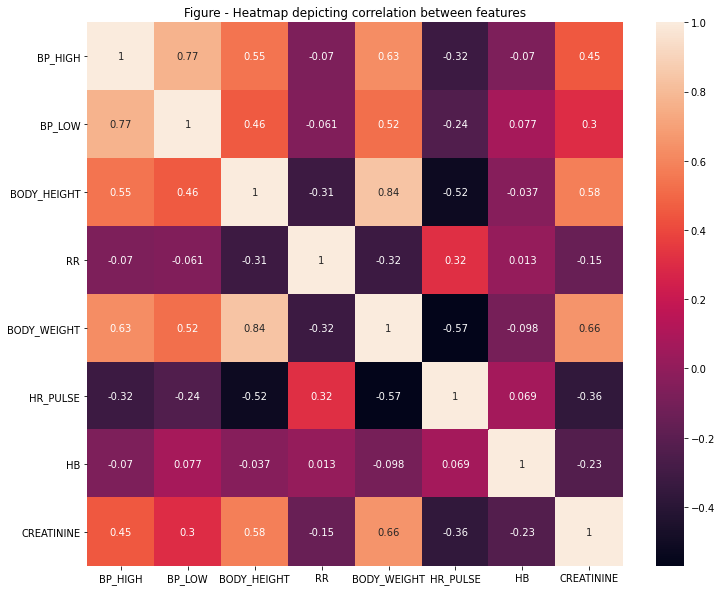

In [19]:
plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title( "Figure - Heatmap depicting correlation between features");

#### <font color='Green'>Iterative process for removing Variables with VIF > 10</font>

Start with variables [BP_HIGH] in descending order and keep removing attributes one by one. <br>
Keep repeating the process unless there is no variable with VIF > 10.<br>
After several iterations - found that has to be removed ['BP_HIGH','BODY_HEIGHT','RR','BP_LOW','BODY_WEIGHT','HR_PULSE'] <br>
The remaining variables captured in X_N for regression

#### <font color='Green'>Began Process with Columns</font>


In [20]:
#columns_to_be_removed = ['BP_HIGH','BP_LOW','BODY_HEIGHT','RR','BODY_WEIGHT','HR_PULSE','HB','CREATININE']

#### <font color='Green'>Ended Process with Columns</font>


In [21]:
columns_to_be_removed = ['BP_HIGH','BODY_HEIGHT','RR','BP_LOW','BODY_WEIGHT','HB']

In [22]:
new_features_vif = list( set(features_vif) - set(columns_to_be_removed) )
vif_factors = get_vif_factors( X[new_features_vif] )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,column,vif
2,CREATININE,8.521651
0,UREA,5.669107
3,AGE,4.299010
1,HR_PULSE,3.493714


<b> We shall use "new_features_vif" attributes along with categorical variables for re-building regression model. </b>

In [23]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )
print(X_new_features)

['CAD_DVD', 'AMBULANCE', 'TRANSFERRED', 'Diabetes2', 'CREATININE', 'other_general', 'PM_VSD', 'OS_ASD', 'ALERT', 'other', 'ELECTIVE', 'GENDER', 'hypertension1', 'CAD_TVD', 'other_respiratory', 'other_tertalogy', 'AGE', 'hypertension3', 'other_nervous', 'ACHD', 'RHD', 'Diabetes1', 'hypertension2', 'UREA', 'CAD_SVD', 'other_heart', 'UNMARRIED', 'HR_PULSE', 'CAD_VSD']


#### <font color='Green'>Regenerate Train and Test</font>

In [24]:
#Re-add 'const' to X_new_features
X_new_features.insert(0, 'const')
train_X = train_X[X_new_features]
test_X  = test_X[X_new_features]

print("Rows Train X:", len(train_X.index), "Columns Train X:", len(train_X.columns))
print("Rows Test X:", len(test_X.index), "Columns Test X:", len(test_X.columns))
print("Length Train y:", len(train_y))
print("Length Test y:", len(test_y))

Rows Train X: 130 Columns Train X: 30
Rows Test X: 56 Columns Test X: 30
Length Train y: 130
Length Test y: 56


#### <font color='Green'>Regenerate Model</font>

In [25]:
# Building the model using training dataset
# Model Building process will take several iterations
model_2 = sm.OLS(train_y, train_X).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                 OLS                       Adj. R-squared:        0.306     
Dependent Variable:    TOTAL_COST_TO_HOSPITAL    AIC:                   3338.2859 
Date:                  2021-07-21 12:08          BIC:                   3418.5768 
No. Observations:      130                       Log-Likelihood:        -1641.1   
Df Model:              27                        F-statistic:           3.108     
Df Residuals:          102                       Prob (F-statistic):    2.02e-05  
R-squared:             0.451                     Scale:                 6.8879e+09
----------------------------------------------------------------------------------
                     Coef.       Std.Err.     t    P>|t|     [0.025       0.975]  
----------------------------------------------------------------------------------
const               52697.4595  57390.9561  0.9182 0.3607  -61137.2299 166532.1488
CAD_DVD             80848.8776  33841.8586  2.3890 0.0187   13723.7116 147974.0436
AMBULANCE         -107298.7131  92542.4320 -1.1595 0.2490 -290856.1882  76258.7621
TRANSFERRED        -36498.8988  49842.5526 -0.7323 0.4657 -135361.3655  62363.5679
Diabetes2           53873.1499  46395.3400  1.1612 0.2483  -38151.7870 145898.0868
CREATININE          57093.4233  30423.4670  1.8766 0.0634   -3251.3792 117438.2258
other_general     -160515.1378 110952.4705 -1.4467 0.1510 -380588.8370  59558.5613
PM_VSD              32980.3012  65325.7254  0.5049 0.6147  -96592.9654 162553.5679
OS_ASD              21350.1694  39179.0742  0.5449 0.5870  -56361.3384  99061.6772
ALERT               52697.4595  57390.9561  0.9182 0.3607  -61137.2299 166532.1488
other              -26713.0053  29430.9665 -0.9076 0.3662  -85089.1879  31663.1772
ELECTIVE          -107240.1770  90399.7650 -1.1863 0.2383 -286547.6823  72067.3283
GENDER                949.0740  18471.0354  0.0514 0.9591  -35688.1372  37586.2852
hypertension1      -15808.4499  30365.3737 -0.5206 0.6038  -76038.0247  44421.1249
CAD_TVD             65920.4878  36074.2868  1.8274 0.0706   -5632.6890 137473.6647
other_respiratory   52274.8554  55399.6259  0.9436 0.3476  -57610.0400 162159.7507
other_tertalogy     62860.8032  40931.1462  1.5358 0.1277  -18325.9313 144047.5377
AGE                  1446.2693    708.3382  2.0418 0.0438      41.2837   2851.2548
hypertension3      -25413.3105  62778.3095 -0.4048 0.6865 -149933.7898  99107.1687
other_nervous       97914.2448  88076.3903  1.1117 0.2689  -76784.8579 272613.3474
ACHD                25397.1977  37077.0085  0.6850 0.4949  -48144.8728  98939.2681
RHD                 76741.5145  33932.9279  2.2616 0.0258    9435.7129 144047.3162
Diabetes1           12009.2387  50711.4779  0.2368 0.8133  -88576.7373 112595.2148
hypertension2      -75112.4590  34176.1391 -2.1978 0.0302 -142900.6689  -7324.2490
UREA                 -453.2343    806.9166 -0.5617 0.5756   -2053.7496   1147.2810
CAD_SVD             96139.5713  68352.0734  1.4065 0.1626  -39436.4421 231715.5847
other_heart         65817.2513  29740.8805  2.2130 0.0291    6826.3559 124808.1466
UNMARRIED            7341.5691  34746.6735  0.2113 0.8331  -61578.2930  76261.4313
HR_PULSE              782.6002    461.7690  1.6948 0.0932    -133.3164   1698.5168
CAD_VSD                 0.0000      0.0000     nan    nan       0.0000      0.0000
----------------------------------------------------------------------------------
Omnibus:                37.286         Durbin-Watson:            2.153            
Prob(Omnibus):          0.000          Jarque-Bera (JB):         84.916           
Skew:                   1.162          Prob(JB):                 0.000            
Kurtosis:               6.206          Condition No.:            53818120930839200
============================================================================

#### <font color='Green'>Extracting Significant Features</font>
Look for pvalues < 0.05 in model object

In [26]:
significant_vars = model_2.pvalues.where(model_2.pvalues < 0.05).dropna()
significant_vars = significant_vars.index.tolist()
significant_vars

['CAD_DVD', 'AGE', 'RHD', 'hypertension2', 'other_heart']

In [27]:
significant_vars = ['const', 'hypertension2', 'CAD_DVD', 'AGE']
# Other_heart and RHD turned out to be insignificant later. So removed them
train_X = train_X[significant_vars]
test_X  = test_X[significant_vars]

print("Rows Train X:", len(train_X.index), "Columns Train X:", len(train_X.columns))
print("Rows Test X:", len(test_X.index), "Columns Test X:", len(test_X.columns))
print("Length Train y:", len(train_y))
print("Length Test y:", len(test_y))

Rows Train X: 130 Columns Train X: 4
Rows Test X: 56 Columns Test X: 4
Length Train y: 130
Length Test y: 56


#### <font color='Green'>Regenerate Model</font>

In [28]:
model_3 = sm.OLS(train_y, train_X).fit()
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:               OLS                     Adj. R-squared:      0.239     
Dependent Variable:  TOTAL_COST_TO_HOSPITAL  AIC:                 3329.6711 
Date:                2021-07-21 12:08        BIC:                 3341.1412 
No. Observations:    130                     Log-Likelihood:      -1660.8   
Df Model:            3                       F-statistic:         14.54     
Df Residuals:        126                     Prob (F-statistic):  3.43e-08  
R-squared:           0.257                   Scale:               7.5491e+09
----------------------------------------------------------------------------
                 Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
----------------------------------------------------------------------------
const         142218.9547 12227.5373 11.6310 0.0000  118021.0178 166416.8916
hypertension2 -71036.9121 30584.2925 -2.3227 0.0218 -131562.3278 -10511.4964
CAD_DVD        55104.4507 26465.4855  2.0821 0.0394    2730.0328 107478.8685
AGE             1503.6297   313.8505  4.7909 0.0000     882.5288   2124.7306
----------------------------------------------------------------------------
Omnibus:                 18.601           Durbin-Watson:              2.223 
Prob(Omnibus):           0.000            Jarque-Bera (JB):           24.017
Skew:                    0.805            Prob(JB):                   0.000 
Kurtosis:                4.357            Condition No.:              175   
============================================================================

"""

### <font color='Green'>STEP 5: Model Diagnostics </font>

#### <font color='Green'>5.1: Perform Model Diagnostics: Linearity of Relationship</font>

We can check this by plotting scatterplot of X and Y. Scatterplot shows that SOLD PRICE is linearly related with SIXERS and ODI-WKTS

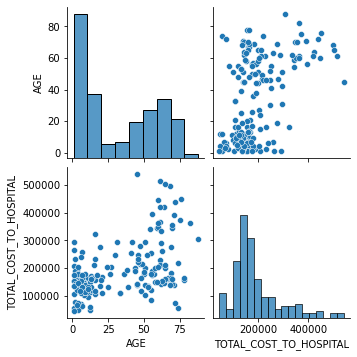

In [29]:
columns = ['AGE','TOTAL_COST_TO_HOSPITAL']
df = data_df_cleaned[columns]
sn.pairplot(df)  
plt.show()

#### <font color='Green'>5.2: Perform Model Diagnostics: Independence of Residuals</font>

How do we check this?
    This is hard to check. If the data is naturally chronological, then the plot of residuals over time may be observed for any specific pattern. Usually, in time-series data, Durbin-Watson Test may be used for assess the independence of time-series data. <br>
    
<b> Durbin Watson Test: </b> <br>
The Durbin Watson Test is a measure of autocorrelation (also called serial correlation) in residuals from regression analysis. Autocorrelation is the similarity of a time series over successive time intervals. The Durbin Watson test reports a test statistic, with a value from 0 to 4, where: <br>

    (A). 2 is no autocorrelation <br>
    (B). 0 to <2 is positive autocorrelation (common in time series data) <br>
    (C). >2 to 4 is negative autocorrelation (less common in time series data) <br>
    Usually value of 1.5 to 2.5 is considered acceptable. <br>
    
In our case, the data is not time series, so we assume independence of residuals. Further, the Durbin Watson test statistic is in acceptable range.

#### <font color='Green'>5.3: Perform Model Diagnostics: Normality of Residuals</font>

In [30]:
# Standardization function
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

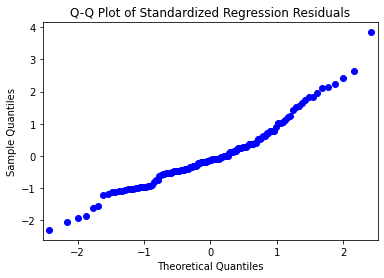

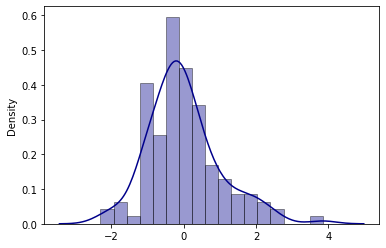

In [31]:
# Gathering residuals and standardizing them
resid = model_3.resid
resid_std =get_standardized_values(resid)

# QQ plot
sm.qqplot(resid_std) 
plt.title( "Q-Q Plot of Standardized Regression Residuals" );
plt.show()

# Density Plot
sn.distplot(resid_std, color = 'darkblue',hist_kws={'edgecolor':'black'});

<b> Both QQ Plot and Distribution Plot show that residuals are approximately normally distributed </b> <br>
<b> We are working with a small sample size </b>

#### <font color='Green'>STEP 5.4: Perform Model Diagnostics: Homoscedasticity of residuals  </font>

The homoscedasticity can be observed by a drawing a residual plot, which is a plot between standardised residual value and standardized predicted value. The plot must be random and any pattern (especially fan-shape) indicates heteroscedasticity

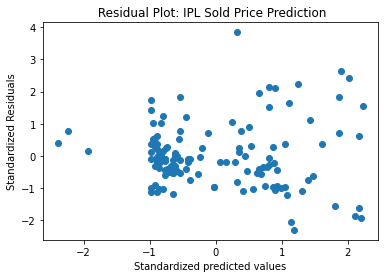

In [32]:
fittedvalues_std = get_standardized_values( model_3.fittedvalues )
plt.scatter( fittedvalues_std, resid_std)
plt.title( " Residual Plot: IPL Sold Price Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

Plot shows that residuals are random and doesnot show any pattern. So residuals are homoscedastic

Incases, where normality and homoscedasticity does not hold, it means that we are unable to build a model that can predict well. We may look at variable transformations. May also, look at respecification of model, by including predictors. Weighted-least squares can help overcome heteroscedasticity.

### <font color='Green'>STEP 6.0: Influencer Analysis  </font>

#### <font color='Green'>STEP 6.1: Leverage Values  </font>

In [33]:
# Detecting Influencers

k = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", k, " and number of observations:", n)

# Threshold for influence = 3*((k + 1)/n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Number of variables: 4  and number of observations: 130
Cutoff for leverage value:  0.115


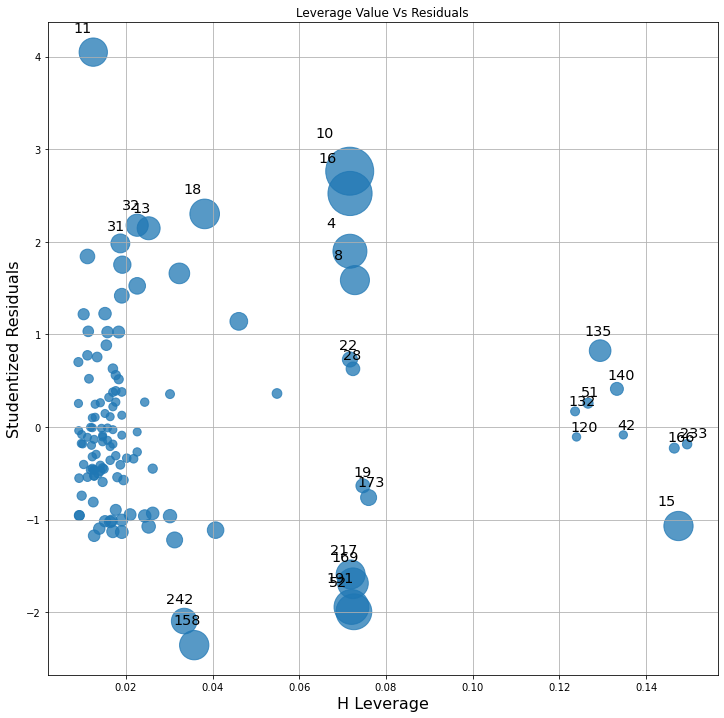

In [34]:
# Influence plot

from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(12, 12))
fig = influence_plot(model_3, ax=ax)
plt.title( "Leverage Value Vs Residuals")
plt.grid()

<b> We can remove observations with H values more than 0.115 and rerun the model </b>

#### <font color='Green'>STEP 6.2: Cook's Distance  </font>

Cook's distance measures how much the predicted value of the dependent variable changes for all the observations in the sample when a particular observation is excluded from the sample for the estimation of regression parameters. A Cook's distance value of > 1 indicates highly influential observation.

No influential variables as per Cooks Distance

values and indices [] (array([], dtype=int64),)


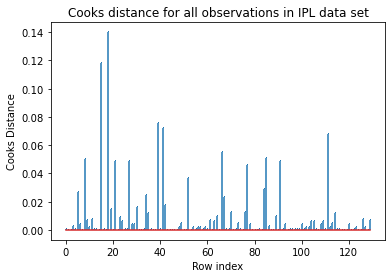

In [35]:
model_influence = model_3.get_influence()
(c, p) = model_influence.cooks_distance
plt.stem( np.arange( len( train_X) ), np.round( c, 3 ), markerfmt="," );
plt.title( "Cooks distance for all observations in IPL data set" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");
print("values and indices",c[c>1.0],np.nonzero(c>1.0))

### <font color='Green'>STEP 7.0: Measure model accuracy and validate model  </font>

In [36]:
pred_y = model_3.predict( test_X[train_X.columns] )

rsquare_train = round(r2_score(train_y, model_3.fittedvalues),4)
rsquare_valid = round(r2_score(test_y, pred_y),4)

rmse_train = round(np.sqrt(mean_squared_error(train_y,model_3.fittedvalues)),4)
rmse_valid = round(np.sqrt(mean_squared_error(test_y,pred_y)),4)

print("R-Square_Train: ", rsquare_train, " RMSE_Train: ", rmse_train)
print("R-Square_Valid: ", rsquare_valid, " RMSE_Valid: ", rmse_valid)

R-Square_Train:  0.2572  RMSE_Train:  85538.2913
R-Square_Valid:  0.3687  RMSE_Valid:  70252.3063


### <font color='Green'>STEP 8.0: Making Predictions  </font>

In [37]:
# Calculating Prediction Intervals

predictions = model_3.get_prediction(test_X[train_X.columns])
predictions_df = round(predictions.summary_frame(alpha=0.05),2)
predictions_df

# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'test_y': test_y,
                            'pred_y': predictions_df['mean'],
                            'pred_y_left': predictions_df['obs_ci_lower'],
                            'pred_y_right': predictions_df['obs_ci_upper'],
                            'pred_interval_size':predictions_df['obs_ci_upper']-predictions_df['obs_ci_lower']} )
pred_y_df

,test_y,pred_y,pred_y_left,pred_y_right,pred_interval_size
153,140545.00,146729.84,-26726.63,320186.31,346912.94
220,205998.00,178306.07,5562.55,351049.59,345487.04
227,212287.00,239954.89,65773.81,414135.96,348362.15
139,84002.50,224918.59,51431.36,398405.82,346974.46
138,97060.80,158758.88,-14310.47,331828.23,346138.70
20,341109.00,278519.41,100450.46,456588.36,356137.90
239,124860.00,158758.88,-14310.47,331828.23,346138.70
46,133130.00,200860.51,28024.36,373696.66,345672.30
160,155352.00,151240.73,-22053.97,324535.44,346589.41
201,109117.00,151240.73,-22053.97,324535.44,346589.41
